In [162]:
num_gausses = 2
colors = palette(rainbow(num_gausses)) 
rnd_gauss = function() {
    c(mean=runif(num_gausses,-10, 10), std=runif(num_gausses, 0.1, 4))
} 
params <- rnd_gauss()
dim(params) = c(num_gausses, 2)
# One colum is one mean and one std
generate_point = function() {
    f_idx = sample(1:num_gausses, 1)
    mu = params[f_idx, 1]
    std = params[f_idx, 2]
    c(rnorm(1, mu, std), 0)  # y=0
}

num_points <- 50
points = t(replicate(num_points, generate_point()))
points <- matrix(points[], nrow=num_points, ncol=2)

estimate <- rnd_gauss()
dim(estimate) = c(num_gausses, num_gausses)

plot_state <- function(estimate, title) {
    plot(points, ylim=c(-0.1, 5), main=title)
    for (i in c(1:num_gausses)) {
        mu = estimate[i, 1]
        std = estimate[i, 2]
        x <- seq(min(points), max(points),length=100)
        hx <- dnorm(x, mu, std)
        lines(x, hx, col=colors[i])
    }
}

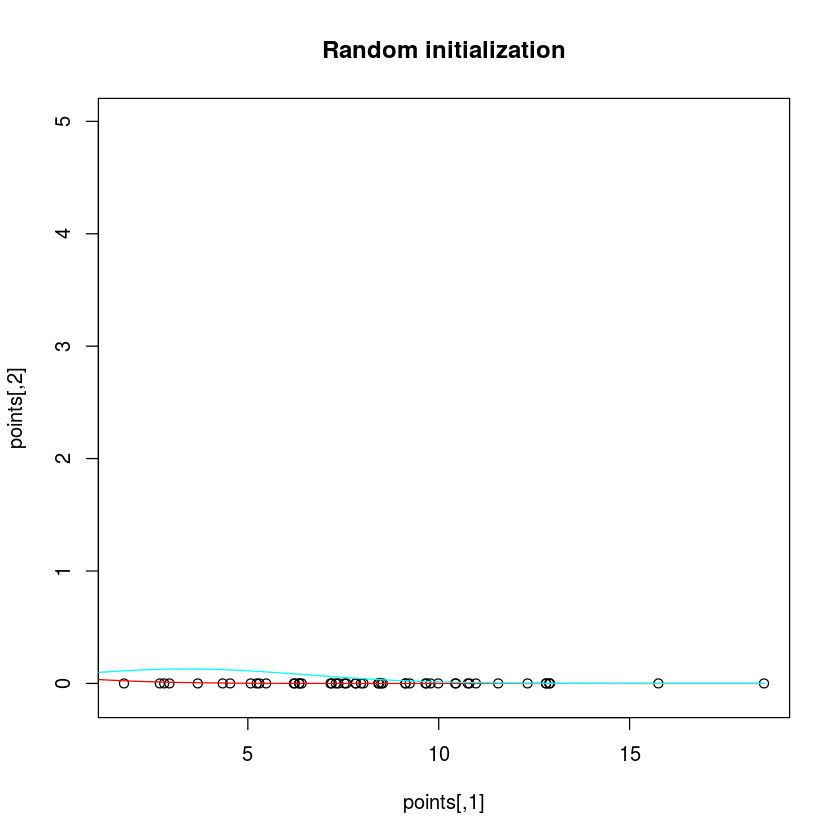

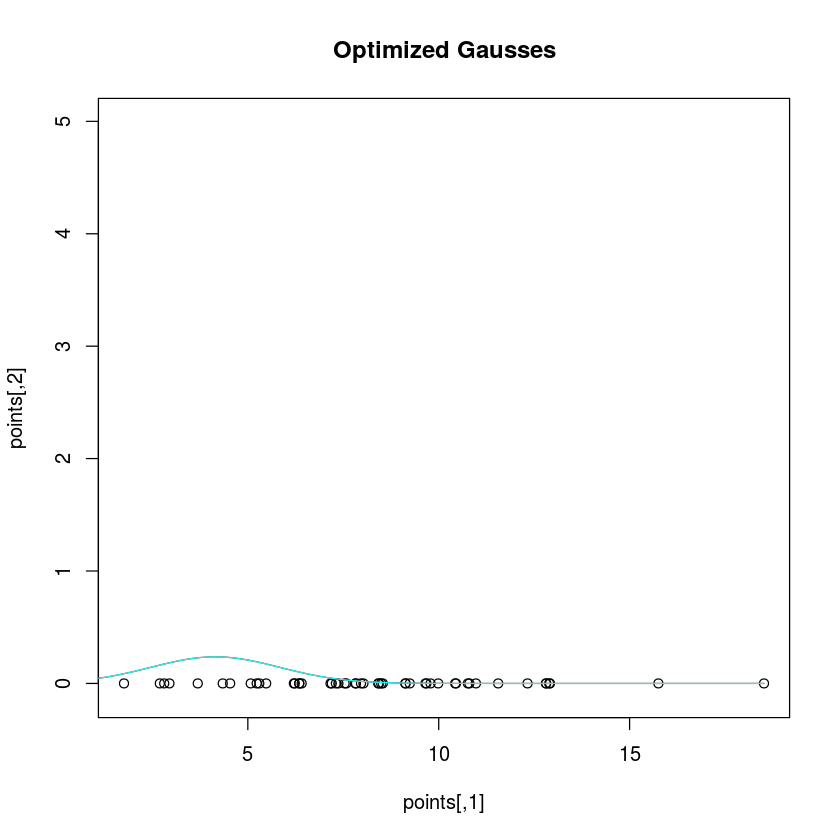

      [,1] [,2]
 [1,]  0.5  0.5
 [2,]  0.5  0.5
 [3,]  0.5  0.5
 [4,]  0.5  0.5
 [5,]  0.5  0.5
 [6,]  0.5  0.5
 [7,]  0.5  0.5
 [8,]  0.5  0.5
 [9,]  0.5  0.5
[10,]  0.5  0.5
[11,]  0.5  0.5
[12,]  0.5  0.5
[13,]  0.5  0.5
[14,]  0.5  0.5
[15,]  0.5  0.5
[16,]  0.5  0.5
[17,]  0.5  0.5
[18,]  0.5  0.5
[19,]  0.5  0.5
[20,]  0.5  0.5
[21,]  0.5  0.5
[22,]  0.5  0.5
[23,]  0.5  0.5
[24,]  0.5  0.5
[25,]  0.5  0.5
[26,]  0.5  0.5
[27,]  0.5  0.5
[28,]  0.5  0.5
[29,]  0.5  0.5
[30,]  0.5  0.5
[31,]  0.5  0.5
[32,]  0.5  0.5
[33,]  0.5  0.5
[34,]  0.5  0.5
[35,]  0.5  0.5
[36,]  0.5  0.5
[37,]  0.5  0.5
[38,]  0.5  0.5
[39,]  0.5  0.5
[40,]  0.5  0.5
[41,]  0.5  0.5
[42,]  0.5  0.5
[43,]  0.5  0.5
[44,]  0.5  0.5
[45,]  0.5  0.5
[46,]  0.5  0.5
[47,]  0.5  0.5
[48,]  0.5  0.5
[49,]  0.5  0.5
[50,]  0.5  0.5


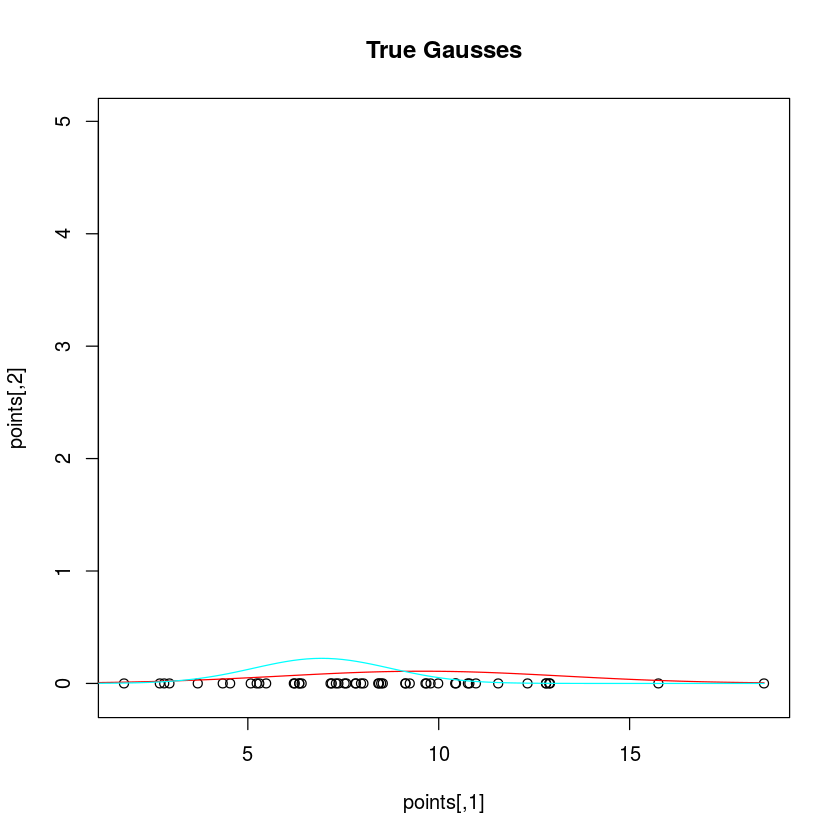

In [163]:


expectation = function(estimate) {
    probabilities = sapply(c(1:num_gausses), function(i) {
        mu = estimate[i, 1]
        std = estimate[i, 2]
        sapply(points[,1], pnorm, mean=mu, sd=std)
    })
    sweep(probabilities, 1 ,rowSums(probabilities),`/`)
}

maximization = function(estimate) {
    probs = expectation(estimate)
    new_means = apply(probs, 2, function(weights) {
        mean(weights * points[,1])
    })
    new_sds = apply(probs, 2, function(weights) {
        sd(weights * points[,1])
    })
    update = c(new_means, new_sds)
    dim(update) = c(num_gausses, 2)
    update
}

plot_state(estimate, "Random initialization")
for (i in c(1:1000)) {
    estimate <- maximization(estimate)
}
plot_state(estimate, "Optimized Gausses")
plot_state(params, "True Gausses")
print(expectation(estimate))
